In [2]:
!pip install ultralytics
!pip install -U ipywidgets
!pip install -q roboflow

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [4]:
import os

# Define the base directory where you want to create the folder
base_directory = '/kaggle/working'

# Define the name of the folder to create
folder_name = 'yolov9'

# Create the full path for the new folder
new_folder_path = os.path.join(base_directory, folder_name)

# Check if the folder already exists or create it if it doesn't exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
    print(f"Folder '{folder_name}' created successfully at '{new_folder_path}'.")
else:
    print(f"Folder '{folder_name}' already exists at '{new_folder_path}'.")


Folder 'yolov9' created successfully at '/kaggle/working/yolov9'.


In [5]:
import os
import random
from ultralytics import YOLO
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [6]:
%cd {HOME}/yolov9
from roboflow import Roboflow
rf = Roboflow(api_key="tEETf3VlRrT4xzDtWyrw")
project = rf.workspace("cse428-bjj14").project("signboard-detection-6ovc7")
version = project.version(12)
dataset = version.download("yolov9")

/kaggle/working/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Signboard-Detection--12 in yolov9:: 100%|██████████| 11702/11702 [00:02<00:00, 5088.38it/s]


In [7]:
# Define the directory path
directory_path = '/kaggle/working/yolov9/Signboard-Detection--12/train/images'

# Initialize a counter for the total number of files
total_files = 0

# Iterate through the directory to count files
for filename in os.listdir(directory_path):
    if os.path.isfile(os.path.join(directory_path, filename)):
        total_files += 1

print(f"Total number of files in '{directory_path}': {total_files}")

Total number of files in '/kaggle/working/yolov9/Signboard-Detection--12/train/images': 4102


In [9]:
train_images = "/kaggle/working/yolov9/Signboard-Detection--12/train/images"
train_labels = "/kaggle/working/yolov9/Signboard-Detection--12/train/labels"

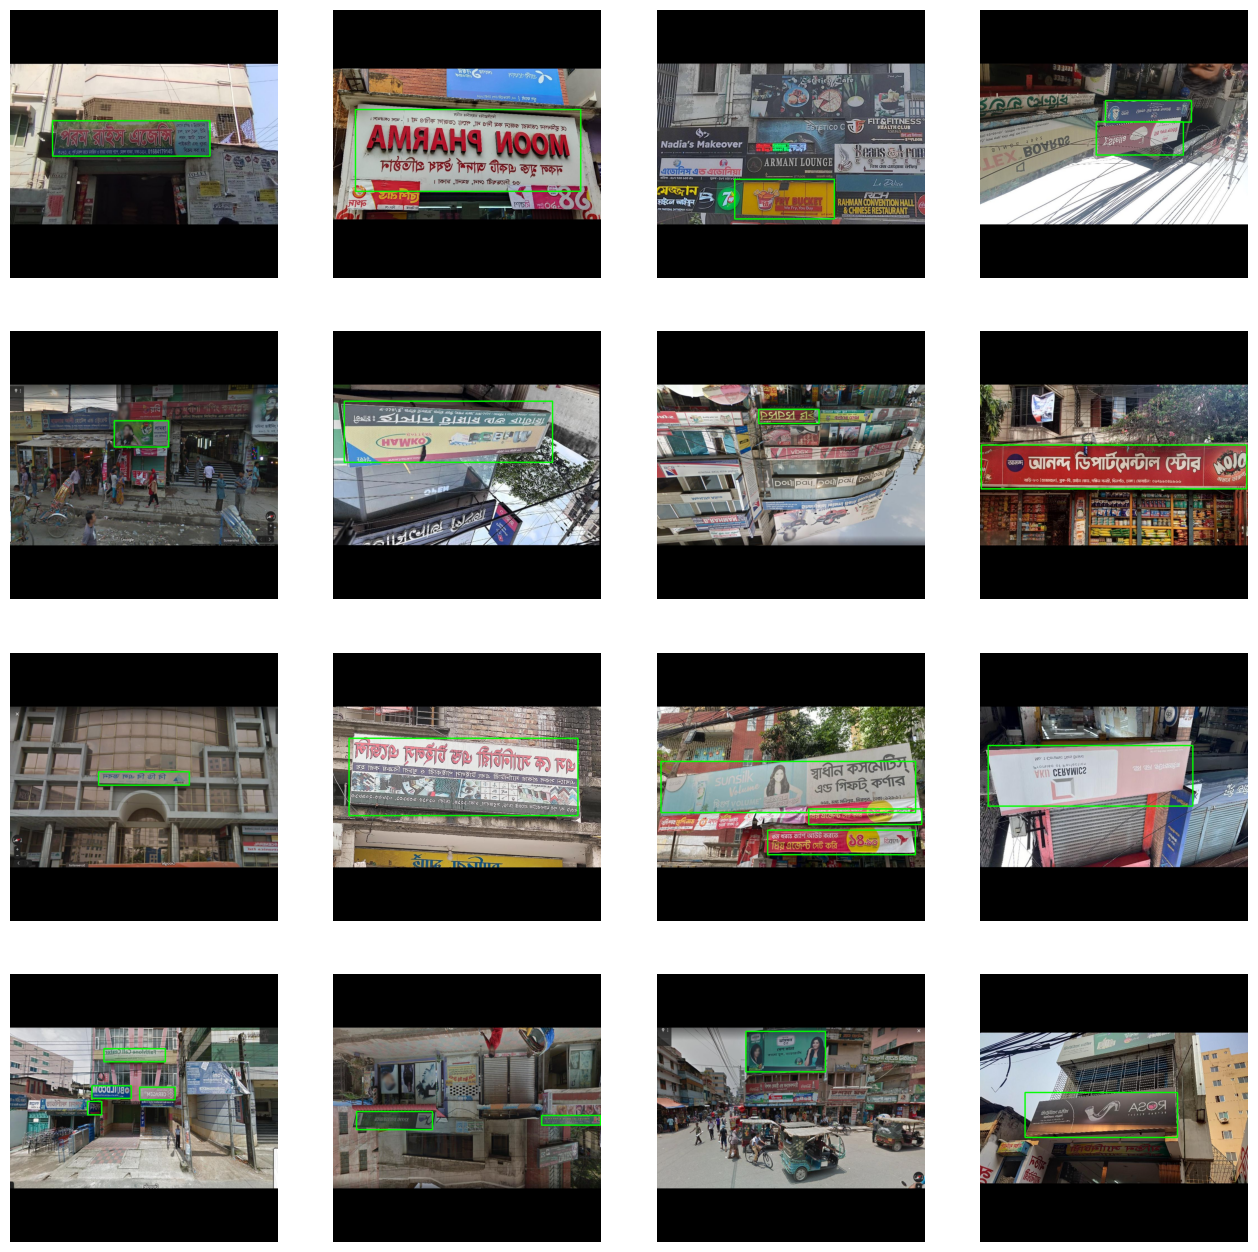

In [10]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Get a list of all the image files in the training images directory
image_files = [file for file in os.listdir(train_images) if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg')]

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()

In [14]:
with open('/kaggle/working/yolov9/Signboard-Detection--12/data.yaml', 'r') as f:
    data = f.read()
print(data)

names:
- signboard
nc: 1
roboflow:
  license: CC BY 4.0
  project: signboard-detection-6ovc7
  url: https://universe.roboflow.com/cse428-bjj14/signboard-detection-6ovc7/dataset/12
  version: 12
  workspace: cse428-bjj14
test: /kaggle/working/yolov9/Signboard-Detection--12/test/images
train: /kaggle/working/yolov9/Signboard-Detection--12/train/images
val: /kaggle/working/yolov9/Signboard-Detection--12/valid/images



In [13]:
import yaml

# Load the YAML content from the file
with open('/kaggle/working/yolov9/Signboard-Detection--12/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Define the replacements
replacements = {
    'test': '/kaggle/working/yolov9/Signboard-Detection--12/test/images',
    'train': '/kaggle/working/yolov9/Signboard-Detection--12/train/images',
    'val': '/kaggle/working/yolov9/Signboard-Detection--12/valid/images'
}

# Apply replacements
for key, value in replacements.items():
    if key in data:
        data[key] = value

# Save the modified YAML content back to the file
with open('/kaggle/working/yolov9/Signboard-Detection--12/data.yaml', 'w') as f:
    yaml.dump(data, f)

print("YAML file updated successfully.")

YAML file updated successfully.


In [15]:
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 960x960 and 3 channels.


# **Testing PreTrained Models**

In [8]:
# model = YOLO("yolov8x.pt")

# result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))

# plot = result_predict[0].plot()
# plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
# display(Image.fromarray(plot))

In [9]:
# fig, axs = plt.subplots(4, 4, figsize = (16, 12))

# # Loop over the random images and plot the object detections
# for i, image_file in enumerate(random_images):
#     row, col = divmod(i, 4)

#     image_path = os.path.join(train_images, image_file)
#     image = cv2.imread(image_path)

#     result_predict = model.predict(image, imgsz=(416))

#     plot = result_predict[0].plot()
#     plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

#     axs[row,col].imshow(plot)
#     axs[row,col].axis('off')

# plt.show()

In [16]:
import wandb

# Log in to WandB with your API key
wandb.login(key='62ed1e63521c4cc055045c4841cbba9e1f1a8e4f')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [24]:
model = YOLO('yolov9e.pt')

# Training the model
model.train(data = '/kaggle/working/yolov9/Signboard-Detection--12/data.yaml',
            epochs = 70,
            optimizer = 'SGD',
            imgsz = 960,
            batch = 8,
            device = [0,1],
           patience = 10,
           cache = False,
           seed = 40,
           single_cls = True,
           cos_lr = True,
           amp = True,
           augment = True,
           nms = True)

Ultralytics YOLOv8.2.8 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                     CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/working/yolov9/Signboard-Detection--12/data.yaml, epochs=70, time=None, patience=10, batch=8, imgsz=960, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=40, deterministic=True, single_cls=True, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

2024-05-05 05:44:49.637127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 05:44:49.637189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 05:44:49.638704: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorBoard: Start with 'tensorboard --logdir runs/detect/train7', view at http://localhost:6006/


wandb: Currently logged in as: ismailsaihan24. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.5
wandb: Run data is saved locally in /kaggle/working/yolov9/wandb/run-20240505_054452-gjxzn9gu
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train7
wandb: ⭐️ View project at https://wandb.ai/ismailsaihan24/YOLOv8
wandb: 🚀 View run at https://wandb.ai/ismailsaihan24/YOLOv8/runs/gjxzn9gu/workspace


Overriding model.yaml nc=80 with nc=1
Transferred 1805/1811 items from pretrained weights
Freezing layer 'model.42.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/yolov9/Signboard-Detection--12/train/labels.cache... 4102 images, 7 backgrounds, 0 corrupt: 100%|██████████| 4102/4102 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/yolov9/Signboard-Detection--12/valid/labels.cache... 1156 images, 12 backgrounds, 0 corrupt: 100%|██████████| 1156/1156 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to runs/detect/train7
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      12.8G       1.07      1.553      1.258         10        960: 100%|██████████| 513/513 [08:40<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:38<00:00,  1.47it/s]


                   all       1156       3233      0.707      0.748      0.773      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      12.6G      1.095      1.175      1.283         11        960: 100%|██████████| 513/513 [08:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.689      0.701      0.733       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      12.8G      1.176      1.342      1.324          5        960: 100%|██████████| 513/513 [08:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.646      0.691       0.68       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      12.7G      1.254      1.402      1.387         14        960: 100%|██████████| 513/513 [08:10<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.484      0.695      0.574      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      12.7G      1.261       1.38      1.405          9        960: 100%|██████████| 513/513 [08:09<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.695      0.703       0.73      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      12.6G      1.227      1.307      1.368         15        960: 100%|██████████| 513/513 [08:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.713      0.732      0.749       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      12.8G      1.227      1.269      1.396          8        960: 100%|██████████| 513/513 [08:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233       0.69      0.729      0.747      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      12.7G      1.173      1.213      1.361         11        960: 100%|██████████| 513/513 [08:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.708      0.732      0.751      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      12.7G      1.167      1.172      1.342         18        960: 100%|██████████| 513/513 [08:09<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.737      0.724      0.759      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      12.7G      1.139      1.148      1.326         13        960: 100%|██████████| 513/513 [08:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233       0.71      0.724      0.749      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      12.7G      1.126      1.138      1.336         12        960: 100%|██████████| 513/513 [08:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [01:37<00:00,  1.49it/s]


                   all       1156       3233      0.737       0.75       0.78       0.55
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

11 epochs completed in 1.820 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 117.3MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.8 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                     CUDA:1 (Tesla T4, 15102MiB)
YOLOv9e summary (fused): 687 layers, 57377171 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 145/145 [03:15<00:00,  1.35s/it]


                   all       1156       3233      0.703       0.77      0.787      0.581
Speed: 0.4ms preprocess, 164.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train7


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 █▅▁▁▁▁▁▁▁▁▁
wandb:                  lr/pg1 ▁▅█████████
wandb:                  lr/pg2 ▁▅█████████
wandb:        metrics/mAP50(B) █▆▄▁▆▇▇▇▇▇█
wandb:     metrics/mAP50-95(B) ▇▆▃▁▅▆▆▆▆▆█
wandb:    metrics/precision(B) ▇▇▅▁▇▇▇▇█▇▇
wandb:       metrics/recall(B) ▆▂▁▁▂▅▄▅▄▄█
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ▁▂▅██▇▇▅▅▄▃
wandb:          train/cls_loss █▂▄▅▅▄▃▂▂▁▁
wandb:          train/dfl_loss ▁▂▄▇█▆█▆▅▄▅
wandb:            val/box_loss ▁▄█▇▆▅▅▅▅▅▄
wandb:            val/cls_loss ▁▃▅█▃▃▃▂▂▂▁
wandb:            val/dfl_loss ▁▄█▆▆▅▅▅▆▅▅
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 0.00951
wandb:                  lr/pg1 0.00951
wandb:                  lr/pg2 0.00951
wandb:        metrics/mAP50(B) 0.78692
wandb:     metrics/mAP50-95(B) 0.58136
wand

In [ ]:
img = mpimg.imread('/kaggle/working/yolov9/runs/detect/train/confusion_matrix_normalized.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [ ]:
model = YOLO('/kaggle/working/yolov9/runs/detect/train/weights/best.pt')

In [ ]:
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

custom_image_dir = '/kaggle/working/yolov9/Signboard-Detection--9/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 9)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


image 1/1 /kaggle/working/yolov9/Signboard-Detection--9/test/images/ID_05_jpg.rf.5f27ccebf3e8d6d5f425c7c357c97194.jpg: 384x640 3 signboards, 63.5ms
Speed: 1.3ms preprocess, 63.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


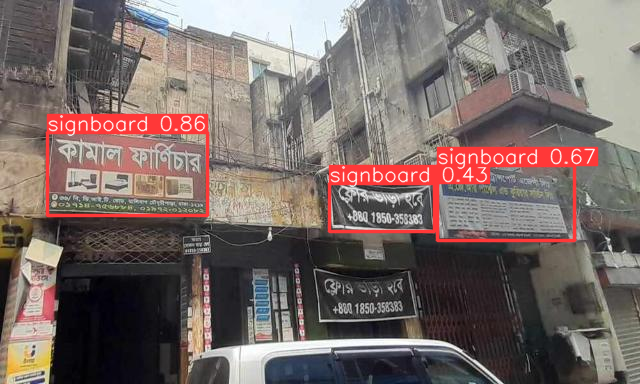

In [27]:
result_predict = model.predict(source = "/kaggle/working/yolov9/Signboard-Detection--9/test/images/ID_05_jpg.rf.5f27ccebf3e8d6d5f425c7c357c97194.jpg",
                               imgsz=(640))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [32]:
import os
from zipfile import ZipFile
from IPython.display import HTML

# Define the directory to be zipped
directory_to_zip = '/kaggle/working/yolov9/runs'

# Define the path for the resulting ZIP file
zip_file_path = '/kaggle/working/YOLOv9.zip'

# Create the ZIP file
with ZipFile(zip_file_path, 'w') as zipf:
    for root, dirs, files in os.walk(directory_to_zip):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory_to_zip))